In [1]:
import os
import matplotlib.pyplot as plt

In [2]:

def count_lines_in_directory(directory_path, output_file):
    with open(output_file, 'w') as f:
        for file_name in os.listdir(directory_path):
            file_path = os.path.join(directory_path, file_name)
            if os.path.isfile(file_path):
                with open(file_path, 'r') as file:
                    lines = sum(1 for line in file)
                    f.write(str(lines)+" "+str(file_name)+"\n")

In [3]:
# create file of number of dogs for every sample
directory_path = '/private/projects/kidney_rtt/dogs_all_samples'  
output_file = '/home/ls/parshas/plots/num_of_dogs.txt'  
count_lines_in_directory(directory_path, output_file)

In [4]:
# with open('/home/ls/parshas/plots/num_of_dogs.txt', 'r') as in_file, open('/home/ls/parshas/plots/num_of_dogs_short.txt', 'w') as out_file:
#     for line in in_file:
#         parts = line.strip().split(' ')
#         first_part = parts[0]
#         second_part = parts[1].split('-')[2]
#         out_file.write(f"{first_part} {second_part}\n")

In [2]:
#after division to health and sick
with open('/private/projects/kidney_rtt/all_plots/SICK_intersect.txt', 'r') as in_file, open('/home/ls/parshas/plots/num_of_dogs_sick_short.txt', 'w') as out_file:
    for line in in_file:
        parts = line.strip().split(' ')
        first_part = parts[0]
        second_part = parts[1].split('-')[2]
        out_file.write(f"{first_part} {second_part}\n")

with open('/private/projects/kidney_rtt/all_plots/HEALTH_intersect.txt', 'r') as in_file, open('/home/ls/parshas/plots/num_of_dogs_health_short.txt', 'w') as out_file:
    for line in in_file:
        parts = line.strip().split(' ')
        first_part = parts[0]
        second_part = parts[1].split('-')[2]
        out_file.write(f"{first_part} {second_part}\n")

<Axes: title={'center': 'Number of Dogs by Patients (Normal)'}, xlabel='Patients', ylabel='Number of Dogs'>

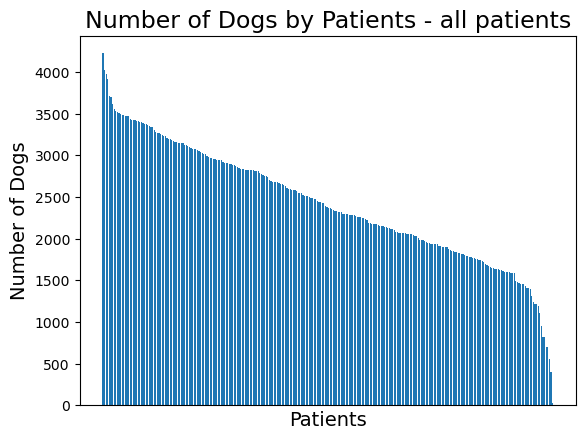

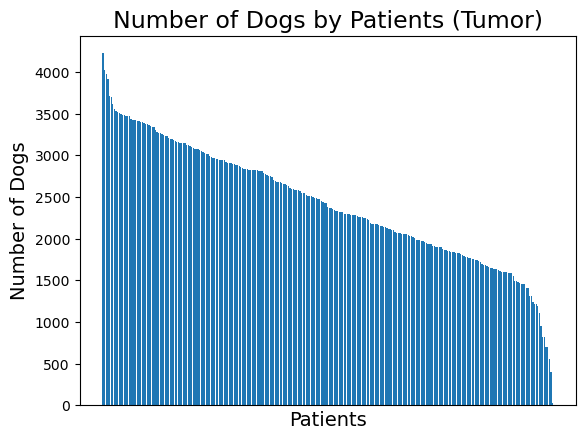

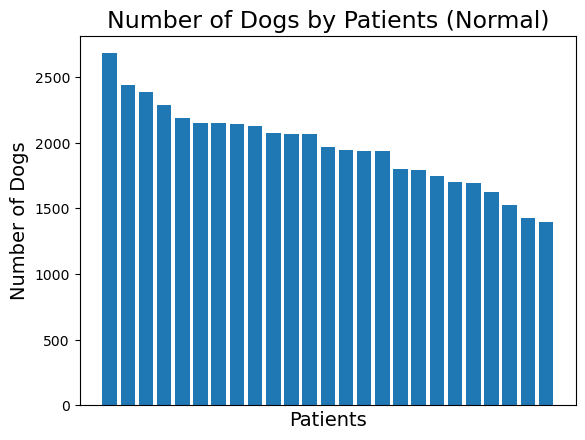

In [12]:
def his_num_of_events_each_patient(file, title):
    patient = []
    num_of_events = []
    patient_num_of_events = []
    with open(file, 'r') as in_file:
        for line in in_file:
            parts = line.strip().split(' ')
            patient_num_of_events.append((parts[1], parts[0]))
            patient.append(parts[1])
            num_of_events.append(float(parts[0]))

    # Sort data by number of events (descending order)
    sorted_data = sorted(zip(patient, num_of_events), key=lambda x: x[1], reverse=True)
    sorted_patient, sorted_num_of_events = zip(*sorted_data)


    # create figure and axis
    fig, ax = plt.subplots()

    # plot data
    ax.bar(sorted_patient, sorted_num_of_events)

    # rotate x-axis labels by 90 degrees
    #plt.xticks(rotation=90)

    ax.set_xticks([])
    sorted_fusion_counts = sorted(patient,
                                  key=lambda x: x[1], reverse=True)

    # set axis labels and title
    ax.set_xlabel("Patients", fontsize = 14)
    ax.set_ylabel("Number of Dogs", fontsize = 14)
    ax.set_title(title, fontsize = 17)

    # show plot
    plt.show()

    # Calculate the average of sorted_num_of_events
    average = sum(sorted_num_of_events) / len(sorted_num_of_events)
    print ("average of " + title + "is : " + average)



his_num_of_events_each_patient('/home/ls/parshas/plots/num_of_dogs_short.txt', "Number of Dogs by Patients - all patients")
his_num_of_events_each_patient('/home/ls/parshas/plots/num_of_dogs_sick_short.txt', "Number of Dogs by Patients (Tumor)")
his_num_of_events_each_patient('/home/ls/parshas/plots/num_of_dogs_health_short.txt', "Number of Dogs by Patients (Normal)")